## 단순선형회귀
### 온도에 다른 오존량의 측정치 데이터 이용

### tensorflow 활용

In [2]:
# 1. module import


import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# scipy 설치
# anaconda prompt 관리지 > 가상환경 진입 > pip install scipy

In [5]:
# 2. data loading(raw data)
# 필요한 col 만 추출


df = pd.read_csv('C:/Users/student/Desktop/머신러닝/ozone.csv')
df = df[["Ozone","Temp"]]

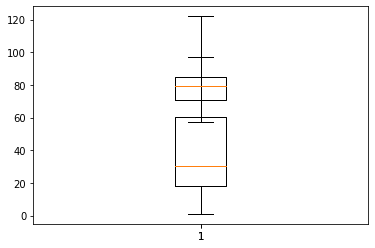

In [15]:
# 3. 데이터 전처리 진행 (Data Pre Processing)


# 3-1. 결측치 처리
df = df.dropna(how="any", inplace=False)

# 3-2. 이상치 확인 및 처리
plt.boxplot(df['Ozone']) # 상위 이상치 존재
plt.boxplot(df['Temp']) # 이상치 존재 안함

# IQR = 3사분위 - 1사분위
# np의 함수를 활용하면 쉽게 구할 수 있음, 두개를 구하니 list로 받기
q1, q3 = np.percentile(df['Ozone'],[25, 75])
iqr = q3 - q1
upper = q3 + iqr * 1.5

mask = df["Ozone"] > upper
df = df.loc[~mask]

# 3-3. 정규화, 표준화
# 정규화(normalization): (요소값-최소값) / (최대값-최소값)
# 표준화(standardzation): (요소값-평균) / 표준편차
# 둘 중 어떤것을 사용하던지 상관은 없음
# 둘 다 수행한 후 조금 더 나은 상태의 것을 택하는 것이 좋음
# 표준화는 음수 값이 나올 수 있음
# 일반적으로는 module 이용, 우리는 프로그램을 이용

df["Temp_Norm"] = (df["Temp"] - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min()) 
df["Ozone_Norm"] = (df["Ozone"] - df["Ozone"].min()) / (df["Ozone"].max() - df["Ozone"].min()) 



In [28]:
# 4. tensorflow 활용 machine learning

# 4-1. training data set 
x_data = df["Temp_Norm"]
y_data = df["Ozone_Norm"]
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 4-2. weight, bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 4-2. hypothesis
H = W * x + b

# 4-5. cost function
cost = tf.reduce_mean(tf.square(H - y))

# 4-6. train node
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# 4-7. session 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 4-8. learning
for step in range(3000):
    _, cost_val = sess.run([train, cost],
                          feed_dict={x: x_data,
                                    y: y_data})
    if step % 300 == 0:
        print(f'cost값:{cost_val}')
        

# 5. prediction
# 가설이 완성되었고, 온도가 80도 일때의 오존량을 알고 싶다면?
# 80 값을 0-1 값으로 표준화 시켜서 계산해야함
tmp = (80-df["Temp"].min()) / (df["Temp"].max()-df["Temp"].min())
print(tmp)
result_scale = sess.run(H, feed_dict={x: tmp})
print(result_scale)
result = result_scale * (df["Ozone"].max()-df["Ozone"].min()) + df["Ozone"].min()
print(result)

cost값:0.26833075284957886
cost값:0.026940830051898956
cost값:0.026612166315317154
cost값:0.02641844004392624
cost값:0.026304246857762337
cost값:0.02623693272471428
cost값:0.02619725838303566
cost값:0.026173865422606468
cost값:0.026160074397921562
cost값:0.026151949539780617
0.575
[0.36654675]
[45.352158]


### scipy 활용

In [30]:
# scipy의 stats module을 이용해서 편안하게 처리
# 기본적인 전처리는 한 후, normalizarion 안해도 됨! 

x = df["Temp"]
y = df["Ozone"]

# scipy의 stats 모듈을 통해서 linear regression을 할 것인데, x,y를 사용할꺼야
result = stats.linregress(x,y)
print(result)
print(80*result[0] + result[1])

# slope: 기울기(W)
# intercept: bais


LinregressResult(slope=2.344807849550286, intercept=-142.19084219133276, rvalue=0.7515377011359844, pvalue=5.802324426210489e-22, stderr=0.19448560867502498)
45.39378577269011


## multiple linear regression(다중선형회귀)

In [ ]:
# 다중선형회귀, 차원을 늘이는 것
# 독립변수가 2개 이상인 경우

# 기본적으로가정이 변경된다. 
# 단순 선형회귀: H = W*x+b
# 다중 선형회귀: H = W1*1 +W2*2 + W3*3 +b
# 다중 선형회귀의 W와



x데이터는 가로(행), 2차원 매트릭스로 표현이 되어있음
(1,534,3,2)과 같이
x를 대문자로 해서 앞으로 보낸 것
매트릭스의 곲으로(매트릭스연산) 표현됨
우리가 구하는 W,b,H 또한 여러개

# H = matmul(X,W) + b

In [ ]:
# 사용하는 데이터
# 퀴즈1 퀴즈2 퀴즈3 최종성적
# 73 80 75 152
93 88 93 185
89 91 90 180
96 98 100 196
73 66 70 142 
80 90 50 ??

In [ ]:
# traininf data set
x_data[[73, 80, 75],
      [93, 88, 93],
      [89, 91, 90],
      [96, 98, 100],
      [73, 66, 70]]
y_data = [[152],[185],[180], [196],[142]]

# placeholder
# shape에는 data의 형태를 쓰는 것, 행과 열 
# data가 많아질때, 즉 새로운 사람의 점수 데이터가 입력될 때,
# 증가하는것은 열이 아닌 행이다.
# 즉, 열은 고정,행은 변할 수있는여지가 잇음

# 예측할때

#X = tf.placeholder(shape=[5,3],dtype=tf.float32)
X = tf.placeholder(shape=[None,3],dtype=tf.float32)


# 위의 X는 placeholder로써 처음 학습할 데이터를 받는 것
# 그리고 예측할 때 예측 값을 넣는 것으로 쓰임
# simple linear에서는 1차원 데이터여서 상관없었지만
# multi에서는 그렇다면 예측할 때에도 5행3열의 데이터로넣어줘야 함
# 따라서 학습과, prediction의 행의 개수는 달라짐
# 이에 대해  행은 설정하지 않을 수 있음: None 사용

# 매트릭스 사용할 때에는 관용적으로 대문자 사용
Y = tf.placeholder(shape=[None,1], dtype=tf.float32 )
# prediction 하면 1행 1열이 나옴


# Weight, bias
W = tf.Variavle(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')


# Hypothesis
H = tf.matmul(X,W) + b


# cost function 이후로는 동일 



In [ ]:
# 다중선형회귀 연습문제
# 관측된 solar, R, wind, temp에 대한 ozone 량에 대한 데이터를 이용해
# 머신러닝을 진행하고
# solar.R: 170, Winf: 7.4, Temp: 67.0에 대한 Ozone 수치를 예측하시ㅗㅇ


In [12]:
# 1. module import

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


,Ozone,Solar.R,Wind,Temp,Temp_Norm,Ozone_Norm,Wind_Norm,Solar.R_Norm
0,41.0,190.0,7.4,67,0.230769,0.330579,0.356643,0.559633
1,36.0,118.0,8.0,72,0.358974,0.289256,0.398601,0.339450
2,12.0,149.0,12.6,74,0.410256,0.090909,0.720280,0.434251
3,18.0,313.0,11.5,62,0.102564,0.140496,0.643357,0.935780
6,23.0,299.0,8.6,65,0.179487,0.181818,0.440559,0.892966
...,...,...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,0.128205,0.107438,1.000000,0.039755
148,30.0,193.0,6.9,70,0.307692,0.239669,0.321678,0.568807
150,14.0,191.0,14.3,75,0.435897,0.107438,0.839161,0.562691
151,18.0,131.0,8.0,76,0.461538,0.140496,0.398601,0.379205


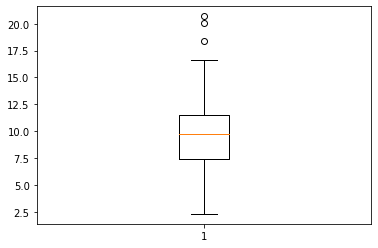

In [16]:
# 2. training data set 불러오기 및 전처리

df = pd.read_csv('C:/Users/student/Desktop/머신러닝/ozone.csv')
df = df[['Ozone', 'Solar.R', 'Wind', 'Temp']]

# 2-1. 결측치 처리
df = df.dropna(how='any', inplace=False)

# 2-2. 이상치 처리
# plt.boxplot(df["Ozone"])
ozone_q1, ozone_q3 = np.percentile(df["Ozone"], [25,75])
ozone_upper = ozone_q3 + (ozone_q3-ozone_q1)*1.5
ozone_mask = df["Ozone"] > ozone_upper
df = df[~ozone_mask]

#plt.boxplot(df["Temp"])
#plt.boxplot(df["Solar.R"])
#plt.boxplot(df["Wind"])
wind_q1, wind_q3 = np.percentile(df["Wind"], [25,75])
wind_upper = wind_q3 + (wind_q3-wind_q1)*1.5
wind_mask = df["Wind"] > wind_upper
df = df[~wind_mask]
display(df)

# 2-3. 표준화
df["Temp_Norm"] = (df["Temp"] - df["Temp"].min()) / (df["Temp"].max() - df["Temp"].min())
df["Ozone_Norm"] = (df["Ozone"] - df["Ozone"].min()) / (df["Ozone"].max() - df["Ozone"].min())
df["Wind_Norm"] = (df["Wind"] - df["Wind"].min()) / (df["Wind"].max() - df["Wind"].min())
df["Solar.R_Norm"] = (df["Solar.R"] - df["Solar.R"].min()) / (df["Solar.R"].max() - df["Solar.R"].min())
display(df)

In [40]:
# 3. training data set 설정

X_data = df[["Solar.R_Norm","Wind_Norm","Temp_Norm"]]
Y_data = df[["Ozone_Norm"]]
X = tf.placeholder(shape = [None, 3], dtype=tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype=tf.float32)


In [41]:
# 4. weight, bias 설정

W = tf.Variable(tf.random_normal([3,1]), name='Weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [42]:
# 5. 가정 설정

H = tf.matmul(X,W) + b

In [43]:
# 6. cost function

cost = tf.reduce_mean(tf.square(H - Y))


In [44]:
# train node 설정

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [45]:
# 7. runner session 설정 및 변수 초기화

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [57]:
# 8. 학습 진행 

for step in range(100000):
    _, v_cost = sess.run([train, cost], 
                         feed_dict={ X: X_data, Y: Y_data })
    if step % 30000 ==0:
        print(f'cost 값은: {v_cost}')

cost 값은: 0.02000964805483818
cost 값은: 0.020008599385619164
cost 값은: 0.020007750019431114
cost 값은: 0.020007075741887093
cost 값은: 0.020006529986858368
cost 값은: 0.020006094127893448
cost 값은: 0.020005738362669945
cost 값은: 0.02000545710325241
cost 값은: 0.020005229860544205
cost 값은: 0.02000504545867443
cost 값은: 0.02000490203499794
cost 값은: 0.02000478468835354
cost 값은: 0.020004691556096077
cost 값은: 0.02000461518764496
cost 값은: 0.020004553720355034
cost 값은: 0.020004503428936005
cost 값은: 0.02000446431338787
cost 값은: 0.020004432648420334
cost 값은: 0.020004404708743095
cost 값은: 0.020004387944936752
cost 값은: 0.02000436931848526
cost 값은: 0.020004356279969215
cost 값은: 0.02000434510409832
cost 값은: 0.020004337653517723
cost 값은: 0.020004333928227425
cost 값은: 0.02000432461500168
cost 값은: 0.02000431902706623
cost 값은: 0.020004315301775932
cost 값은: 0.020004313439130783
cost 값은: 0.020004311576485634
cost 값은: 0.020004305988550186
cost 값은: 0.020004305988550186
cost 값은: 0.020004304125905037
cost 값은: 0.0200043078

cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0.020004302263259888
cost 값은: 0

In [58]:
# 예측하기 전에 값 표준화 시켜주기

[[170, 7.4, 67.0]]

# Solar.R
Solar_scale = (170-df["Solar.R"].min()) / (df["Solar.R"].max()-df["Solar.R"].min())
print(f'Solar_scale:{Solar_scale}')

Wind_scale = (7.4-df["Wind"].min()) / (df["Wind"].max()-df["Wind"].min())
print(f'Wind_scale:{Wind_scale}')

Temp_scale = (67.0-df["Temp"].min()) / (df["Temp"].max()-df["Temp"].min())
print(f'Temp_scale:{Temp_scale}')

result_Norm = sess.run(H, feed_dict={X: [[Solar_scale,Wind_scale,Temp_scale]]})
print(result)

result = result_Norm * (df["Ozone"].max() - df["Ozone"].min()) + df["Ozone"].min() 
print(result)

Solar_scale:0.4984709480122324
Wind_scale:0.35664335664335667
Temp_scale:0.23076923076923078
[[28.515059]]
[[27.978495]]


In [1]:
# 위의 과정을 sklearn module을 이용해서 학습시키고 예측까지 수행해보자

# 1. module import
# anaconda > 관리자 권한으로 실행 > 가상환경 진입 > pip install sklearn
from sklearn import linear_model
import numpy as np
import pandas as pd


In [3]:
# 2. data 불러오기및 전처리


df = pd.read_csv('C:/Users/student/Desktop/머신러닝/ozone.csv')
df = df[['Ozone', 'Solar.R', 'Wind', 'Temp']]

# 2-1. 결측치 처리
df = df.dropna(how='any', inplace=False)

# 2-2. 이상치 처리
#plt.boxplot(df["Ozone"])
ozone_q1, ozone_q3 = np.percentile(df["Ozone"], [25,75])
ozone_upper = ozone_q3 + (ozone_q3-ozone_q1)*1.5
ozone_mask = df["Ozone"] > ozone_upper
df = df[~ozone_mask]

#plt.boxplot(df["Temp"])
#plt.boxplot(df["Solar.R"])
#plt.boxplot(df["Wind"])
wind_q1, wind_q3 = np.percentile(df["Wind"], [25,75])
wind_upper = wind_q3 + (wind_q3-wind_q1)*1.5
wind_mask = df["Wind"] > wind_upper
df = df[~wind_mask]
display(df)

# 2-3. 표준화
# scipy, sklearn과 같은 module은 표준화, 정규화 알아서 해준다.



,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


In [9]:
# 3. training data set 설정
# 따로 shape, dtype 설정할 필요없음

X = df[["Solar.R","Wind","Temp"]]
Y = df["Ozone"]

# 4. learning
lm = linear_model.LinearRegression()
lm.fit(X,Y)

# 5. 예측
prediction = lm.predict([[170,7.4,67]])
print(f'예측값은:{prediction}')

# 이는 정학한 값을 도출했는지에 대해 확인할 때만 사용하기!

예측값은:[27.97594664]


In [17]:
# tensorflow 활용
# 정규화를 일일이 계산하지 않는 법?

# 1. module import
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# 2. data 불러오기및 전처리
df = pd.read_csv('C:/Users/student/Desktop/머신러닝/ozone.csv')
df = df[['Ozone', 'Solar.R', 'Wind', 'Temp']]

# 2-1. 결측치 처리
df = df.dropna(how='any', inplace=False)

# 2-2. 이상치 처리
#plt.boxplot(df["Ozone"])
ozone_q1, ozone_q3 = np.percentile(df["Ozone"], [25,75])
ozone_upper = ozone_q3 + (ozone_q3-ozone_q1)*1.5
ozone_mask = df["Ozone"] > ozone_upper
df = df[~ozone_mask]

#plt.boxplot(df["Temp"])
#plt.boxplot(df["Solar.R"])
#plt.boxplot(df["Wind"])
wind_q1, wind_q3 = np.percentile(df["Wind"], [25,75])
wind_upper = wind_q3 + (wind_q3-wind_q1)*1.5
wind_mask = df["Wind"] > wind_upper
df = df[~wind_mask]
display(df)

# 2-3. 표준화
# 나중에 처리할것


# 3. machine learning
x_data =df[["Solar.R","Wind","Temp"]]
x_data = MinMaxScaler().fit_transform(x_data)
print(x_data)

y_data = df[["Ozone"]]
y_data = MinMaxScaler().fit_transform(y_data)
print(y_data)

# 이후의 모든 과정은 동일함 



,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
...,...,...,...,...
147,14.0,20.0,16.6,63
148,30.0,193.0,6.9,70
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


[[0.55963303 0.35664336 0.23076923]
 [0.33944954 0.3986014  0.35897436]
 [0.43425076 0.72027972 0.41025641]
 [0.93577982 0.64335664 0.1025641 ]
 [0.89296636 0.44055944 0.17948718]
 [0.28134557 0.8041958  0.02564103]
 [0.76146789 0.51748252 0.28205128]
 [0.86544343 0.48251748 0.20512821]
 [0.81651376 0.6013986  0.25641026]
 [0.17737003 0.76223776 0.        ]
 [1.         0.64335664 0.15384615]
 [0.91743119 0.67832168 0.20512821]
 [0.96330275 0.64335664 0.25641026]
 [0.11314985 0.51748252 0.1025641 ]
 [0.0030581  0.51748252 0.02564103]
 [0.95718654 1.         0.38461538]
 [0.05504587 0.51748252 0.07692308]
 [0.25993884 0.67832168 0.07692308]
 [0.01834862 0.67832168 0.23076923]
 [0.74923547 0.88111888 0.58974359]
 [0.66055046 0.23776224 0.53846154]
 [0.83180428 0.35664336 0.46153846]
 [0.36697248 0.51748252 0.61538462]
 [0.86850153 0.8041958  0.82051282]
 [0.96636086 0.64335664 0.74358974]
 [0.43119266 0.3986014  0.61538462]
 [0.56269113 0.88111888 0.48717949]
 [0.09174312 0.48251748 0.17